In [2]:
# importing packages
from understatscraper import Understat
import pandas as pd
from mplsoccer.pitch import Pitch, VerticalPitch
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
# instance of the class

understat = Understat()

### Seasons of Batshuayi between 2015 and 2021

- 2015-16 Ligue 1 Marseille
- 2016-18 EPL Chelsea
- 2017-18 Bundesliga Borussia Dortmund (half season loan)
- 2018-19 La Liga Valencia (half season loan)
- 2018-19 EPL Crystal Palace (half season loan)
- 2019-20 EPL Chelsea
- 2020-21 EPL Crystal Palace

In [57]:
ligues = ['Ligue 1','EPL','EPL','Bundesliga','La liga','EPL','EPL','EPL']
seasons = [2015,2016,2017,2017,2018,2018,2019,2020]

In [58]:
# creating dataframe by iterating through two lists
df = pd.DataFrame()
for l,s in zip(ligues,seasons):
    df_b = understat.season(l,s,player="Michy Batshuayi")
    df = df.append(df_b)

### Inspecting dataframe

In [64]:
df.head()

,id,minute,result,X,Y,xG,player,h_a,player_id,situation,season,shotType,match_id,h_team,a_team,h_goals,a_goals,date,player_assisted,lastAction
0,61453,7,MissedShots,0.8730000305175781,0.5829999923706055,0.12163817882537842,Michy Batshuayi,h,1678,OpenPlay,2015,LeftFoot,1871,Marseille,Caen,0,1,2015-08-08 23:00:00,Abdel Barrada,Throughball
2,61458,25,BlockedShot,0.909000015258789,0.675,0.06413242965936661,Michy Batshuayi,h,1678,OpenPlay,2015,LeftFoot,1871,Marseille,Caen,0,1,2015-08-08 23:00:00,Florian Thauvin,Pass
3,61460,29,SavedShot,0.919000015258789,0.555,0.08026830852031708,Michy Batshuayi,h,1678,FromCorner,2015,Head,1871,Marseille,Caen,0,1,2015-08-08 23:00:00,Abdel Barrada,Cross
5,61462,38,BlockedShot,0.9230000305175782,0.48200000762939454,0.5214341878890991,Michy Batshuayi,h,1678,FromCorner,2015,RightFoot,1871,Marseille,Caen,0,1,2015-08-08 23:00:00,None,None
11,61709,82,MissedShots,0.7559999847412109,0.39799999237060546,0.01823040470480919,Michy Batshuayi,a,1678,OpenPlay,2015,RightFoot,1886,Reims,Marseille,1,0,2015-08-16 16:00:00,None,TakeOn


In [67]:
# resetting index
df.reset_index(drop=True,inplace=True)

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253 entries, 0 to 252
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               253 non-null    object
 1   minute           253 non-null    object
 2   result           253 non-null    object
 3   X                253 non-null    object
 4   Y                253 non-null    object
 5   xG               253 non-null    object
 6   player           253 non-null    object
 7   h_a              253 non-null    object
 8   player_id        253 non-null    object
 9   situation        253 non-null    object
 10  season           253 non-null    object
 11  shotType         253 non-null    object
 12  match_id         253 non-null    object
 13  h_team           253 non-null    object
 14  a_team           253 non-null    object
 15  h_goals          253 non-null    object
 16  a_goals          253 non-null    object
 17  date             253 non-null    ob

In [73]:
# backup
df2 = df.copy()

In [76]:
df['X'] = (pd.to_numeric(df['X'])/100)*120*100
df['Y'] = (pd.to_numeric(df['Y'])/100)*80*100
df['xG'] = pd.to_numeric(df['xG'])

In [78]:
df.xG.sum()

39.91443486139178

In [81]:
df['result'].value_counts()

MissedShots    83
SavedShot      68
BlockedShot    55
Goal           40
ShotOnPost      6
OwnGoal         1
Name: result, dtype: int64

In [88]:
df = df[df['result']!='OwnGoal'] 

In [91]:
df.reset_index(drop=True,inplace=True)

In [92]:
df[df['result'] == 'Goal']['shotType'].value_counts()

RightFoot    20
LeftFoot     16
Head          4
Name: shotType, dtype: int64

### Shotmap

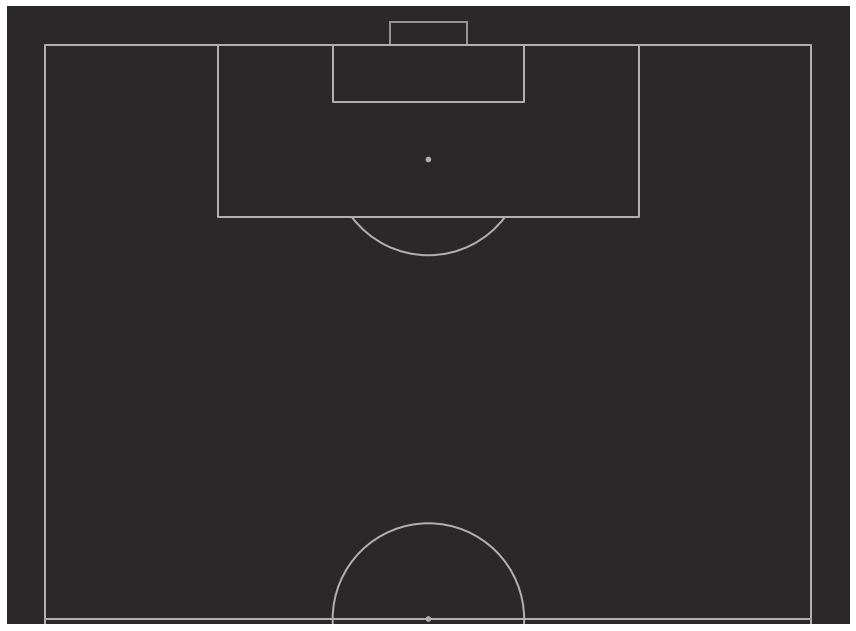

In [93]:
pitch = VerticalPitch(pad_bottom=0.5,  # pitch extends slightly below halfway line
                      half=True,  # half of a pitch
                      goal_type='box',
                      goal_alpha=0.8,
                     pitch_color='#2a2829')  # control the g

fig, ax = pitch.draw(figsize=(12, 10))